In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Dataset dari binance.me didapat menggunakan python binance

In [2]:
# load the dataset
df = pd.read_csv("bitcoin-binance.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060


In [3]:
len(df) # jumlah data

1927

Deskripsi Variabel

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1927 non-null   object 
 1   Open    1927 non-null   float64
 2   High    1927 non-null   float64
 3   Low     1927 non-null   float64
 4   Close   1927 non-null   float64
 5   Volume  1927 non-null   float64
dtypes: float64(5), object(1)
memory usage: 90.5+ KB


terdapat 1 column bertipe objek dan 5 column bertipe float, lalu tidak ada missing value

In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000
mean,19469.885631,20021.006679,18835.915750,19476.294489,65837.615821
std,16886.425586,17351.228673,16345.460688,16883.075320,70380.120695
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068
25%,7257.345000,7431.260000,7071.500000,7260.750000,30174.525822
50%,10373.600000,10683.160000,10080.000000,10374.990000,46275.669120
75%,31932.120000,33092.515000,30111.000000,31934.355000,73904.418054
max,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783


cek apakah ada outliners

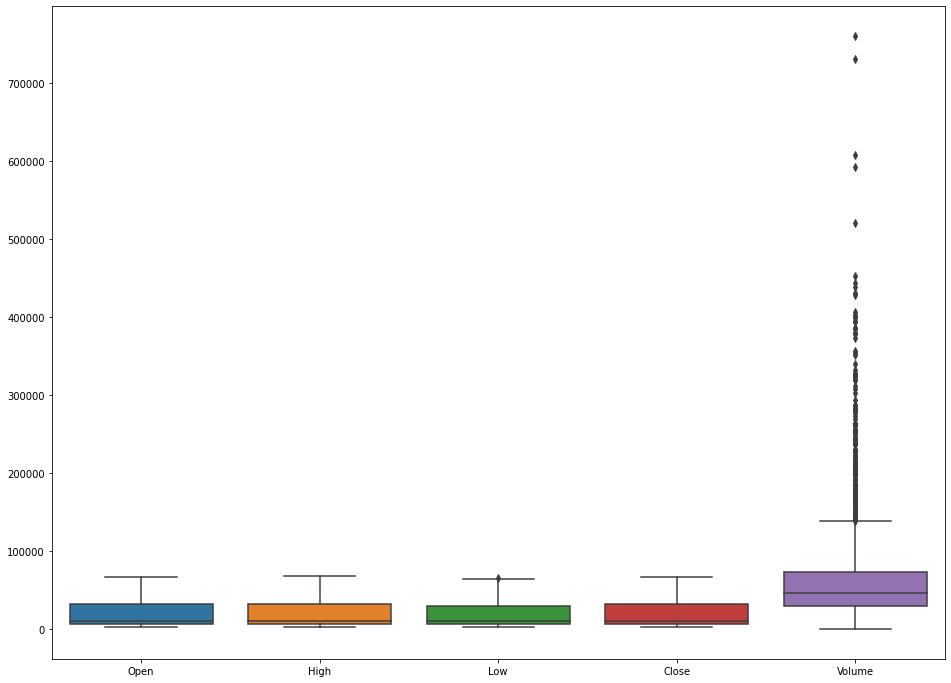

In [6]:
numerical = [x for x in df.columns if x != 'Date']
plt.figure(figsize=(16,12))
sns.boxplot(data=df[numerical])
plt.show()

kolom low dan volume memiliki outliner, salah satu cara untuk menangani ouliners adalah dengan menggunakan IQR Method

In [7]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
bottom = Q1 - 1.5 * IQR
top = Q3 + 1.5 * IQR
df = df[~((df < bottom) | (df > top)).any(axis=1)]
df.head()

<ipython-input-7-533f5a00873d>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < bottom) | (df > top)).any(axis=1)]


,Date,Open,High,Low,Close,Volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060


Univariate Analysis

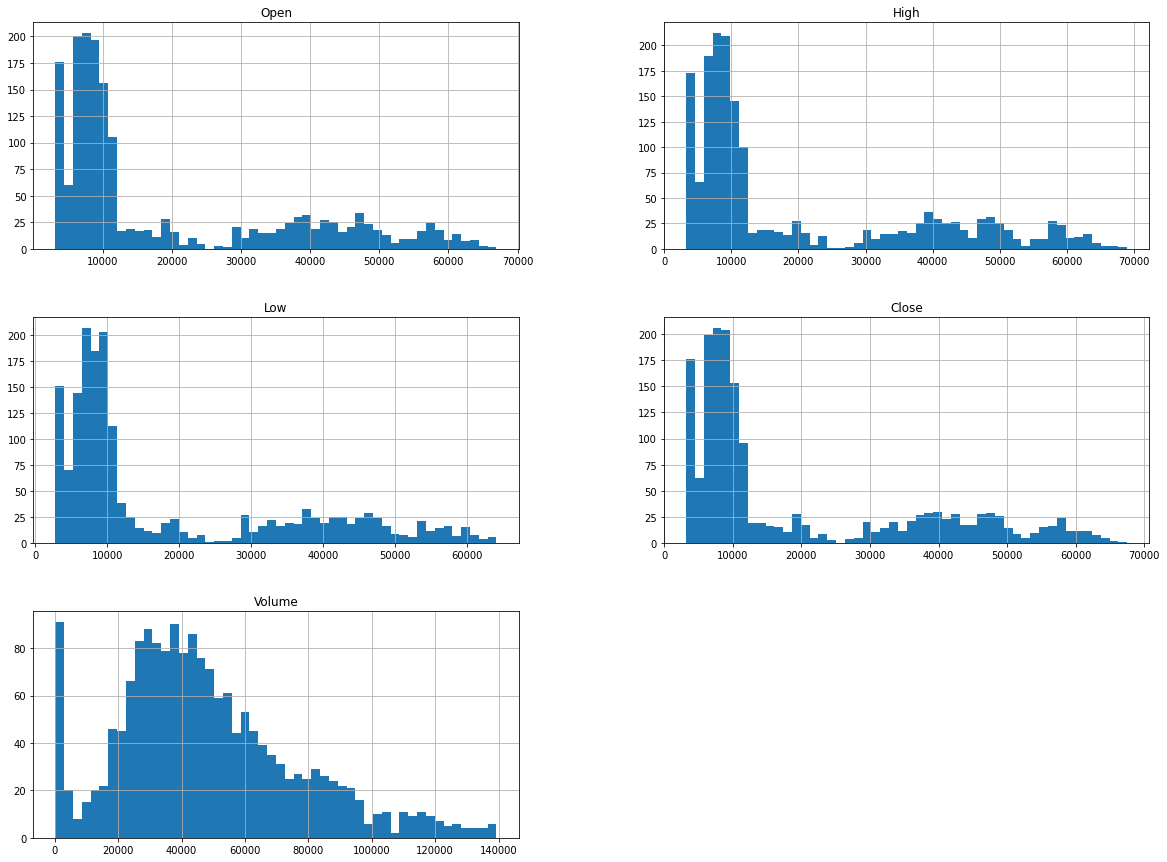

In [8]:
df[numerical].hist(bins=50, figsize=(20,15))
plt.show()

Multivariate Analysis

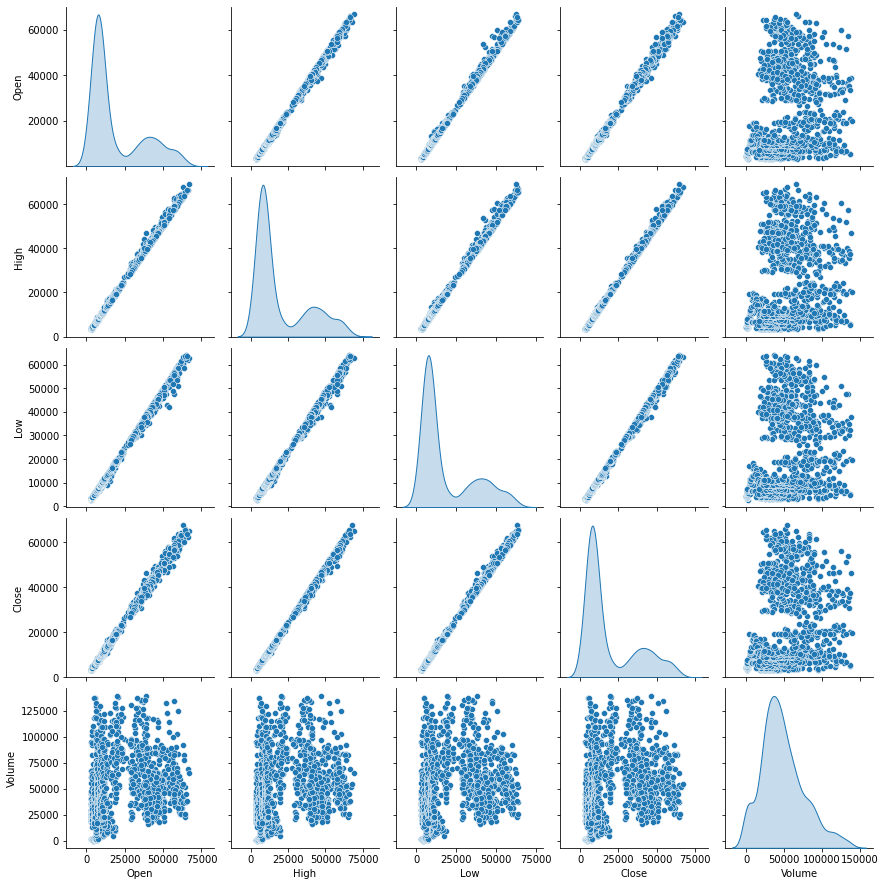

In [9]:
sns.pairplot(df[numerical], diag_kind = 'kde')

Data Preparation

drop kolom yang tidak perlu

In [10]:
df = df.drop(['Date', 'Volume'], axis=1)
df.head()

,Open,High,Low,Close
0,4261.48,4485.39,4200.74,4285.08
1,4285.08,4371.52,3938.77,4108.37
2,4108.37,4184.69,3850.00,4139.98
3,4120.98,4211.08,4032.62,4086.29
4,4069.13,4119.62,3911.79,4016.00


Train-Test-Split

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [13]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Total # of sample in train dataset: {len(y_train)}')
print(f'Total # of sample in test dataset: {len(y_test)}')

Total # of sample in whole dataset: 1753
Total # of sample in train dataset: 1402
Total # of sample in test dataset: 351
Total # of sample in train dataset: 1402
Total # of sample in test dataset: 351


Standarisasi

In [14]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['RF', 'KNN', 'Boosting', 'SVR'])

Modeling dengan KNN

In [16]:
from sklearn.model_selection import GridSearchCV

def grid_search(model, hyperparameters):
  results = GridSearchCV(
      model,
      hyperparameters,
      cv=5,
      verbose=1,
      n_jobs=6
  )

  return results

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor()
hyperparameters = {
    'n_neighbors': range(1, 10)
}
knn_search = grid_search(knn, hyperparameters)
knn_search.fit(X_train, y_train)

print(knn_search.best_params_)
print(knn_search.best_score_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 4}
0.999003301668601


Modeling dengan Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
 
RF = RandomForestRegressor()
hyperparameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
RF_search = grid_search(RF, hyperparameters)
RF_search.fit(X_train, y_train)

print(RF_search.best_params_)
print(RF_search.best_score_) 

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.998964621324476


Modelling dengan Boosting Algorithm

In [19]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor()      
hyperparameters = {'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                   'n_estimators': [25, 50, 75, 100],
                   'random_state': [11, 33, 55, 77]
                } 
boosting_search = grid_search(boosting, hyperparameters)                      
boosting_search.fit(X_train, y_train)
print(boosting_search.best_params_)
print(boosting_search.best_score_) 

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 77}
0.9944809466803157


Modelling dengan SVR 

In [20]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr= SVR()            
hyperparameters = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 10, 100, 1000],
    'gamma': [0.3, 0.03, 0.003, 0.0003]
}               
svr_search = grid_search(svr, hyperparameters)
svr_search.fit(X_train, y_train)
print(svr_search.best_params_)
print(svr_search.best_score_) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 1000, 'gamma': 0.3, 'kernel': 'rbf'}
0.9956514153940639


Model Training

In [21]:
knn = KNeighborsRegressor(n_neighbors= 4)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [22]:
RF = RandomForestRegressor(bootstrap= True, max_depth= 80, max_features= 2, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 200)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200)

In [23]:
boosting = AdaBoostRegressor(learning_rate= 0.1, n_estimators= 100, random_state= 77)   
boosting.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=77)

In [24]:
svr = SVR(C= 1000, gamma= 0.3, kernel= 'rbf')
svr.fit(X_train, y_train)

SVR(C=1000, gamma=0.3)

Evaluasi Model

In [25]:
model_dict = {
    'RF': RF,
    'KNN': knn,
    'Boosting': boosting,
    "SVR": svr
}

for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_train, model.predict(X_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_test, model.predict(X_test))

models.head()

,train_mse,test_mse
RF,127854.807128,375559.28038
KNN,160238.994297,350222.639866
Boosting,1569425.731112,2114822.604449
SVR,1176678.656931,1277824.200873


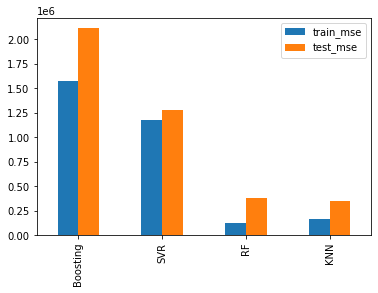

In [26]:
models.sort_values(by='test_mse', ascending=False).plot(kind='bar', zorder=3)

Menguji 4 algoritma

In [28]:
prediksi = X_test[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_KNN,prediksi_Boosting,prediksi_SVR
0,6529.2,6614.7,6604.2,5664.8,6751.7
